In [242]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
with open('output.json') as file:
    df = json.load(file)

К сожалению учитывая способ получения данных, нам придется обрабатывать каждую таблицу отдельно

In [244]:
def data_analysis(url):
    sprint_race = pd.DataFrame(
        df[url]['drivers']['Sprint Race Results'])
    feature_race = pd.DataFrame(
        df[url]['drivers']['Feature Race Results'])
    qualifying = pd.DataFrame(
        df[url]['drivers']['Qualifying Session Results'])

    print(
        f"Гонка проходит на трассе: {df[url]['track']['Track Name']} в {df[url]['track']['Country']} {df[url]['track']['City']} {df[url]['track']['Date']}. Трасса длиной в {df[url]['track']['Length (Km)']} киллометра")

    print('На sprint_race:')
    display(sprint_race.head())
    print('На feature_race:')
    display(feature_race.head())
    print('На qualifying:')
    display(qualifying.head())

    print("Статистика по гонщикам: ")
    print('На sprint_race:')
    display(sprint_race.describe())
    print('На feature_race:')
    display(feature_race.describe())
    print('На qualifying:')
    display(qualifying.describe())

    print("Количество уникальных гонщиков: ")
    print('На sprint_race:')
    display(sprint_race['Driver Name'].value_counts())
    print('На feature_race:')
    display(feature_race['Driver Name'].value_counts())
    print('На qualifying:')
    display(qualifying['Driver Name'].value_counts())

    print("Количество уникальных значений: ")
    print('На sprint_race:')
    display(sprint_race.nunique())
    print('На feature_race:')
    display(feature_race.nunique())
    print('На qualifying:')
    display(qualifying.nunique())


In [245]:
# for i in df.keys():
#     data_analysis(i)

Проанализировав данные, можно дальше исследовать их.

Данные законменчины чтобы не перезагружать файл  

In [246]:
points = {}
points_feature_race = {1: 25, 2: 18, 3: 15, 4: 12, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2, 10: 1}
points_sprint_race = {1: 15, 2: 12, 3: 10, 4: 8, 5: 6, 6: 4, 7: 2, 8: 1}


def points_counter(url):
    sprint_race = pd.DataFrame(df[url]['drivers']['Sprint Race Results'])
    feature_race = pd.DataFrame(df[url]['drivers']['Feature Race Results'])

    for k in range(len(sprint_race)):
        racer = sprint_race.loc[k, 'Driver Name']
        position = sprint_race.loc[k, 'Position']
        if racer in points:
            points[racer] += points_sprint_race.get(position, 0)
        else:
            points[racer] = points_sprint_race.get(position, 0)

    for j in range(len(feature_race)):
        racer = feature_race.loc[j, 'Driver Name']
        position = feature_race.loc[j, 'Position']
        if racer in points:
            points[racer] += points_feature_race.get(position, 0)
        else:
            points[racer] = points_feature_race.get(position, 0)


for i in df:
    points_counter(i)

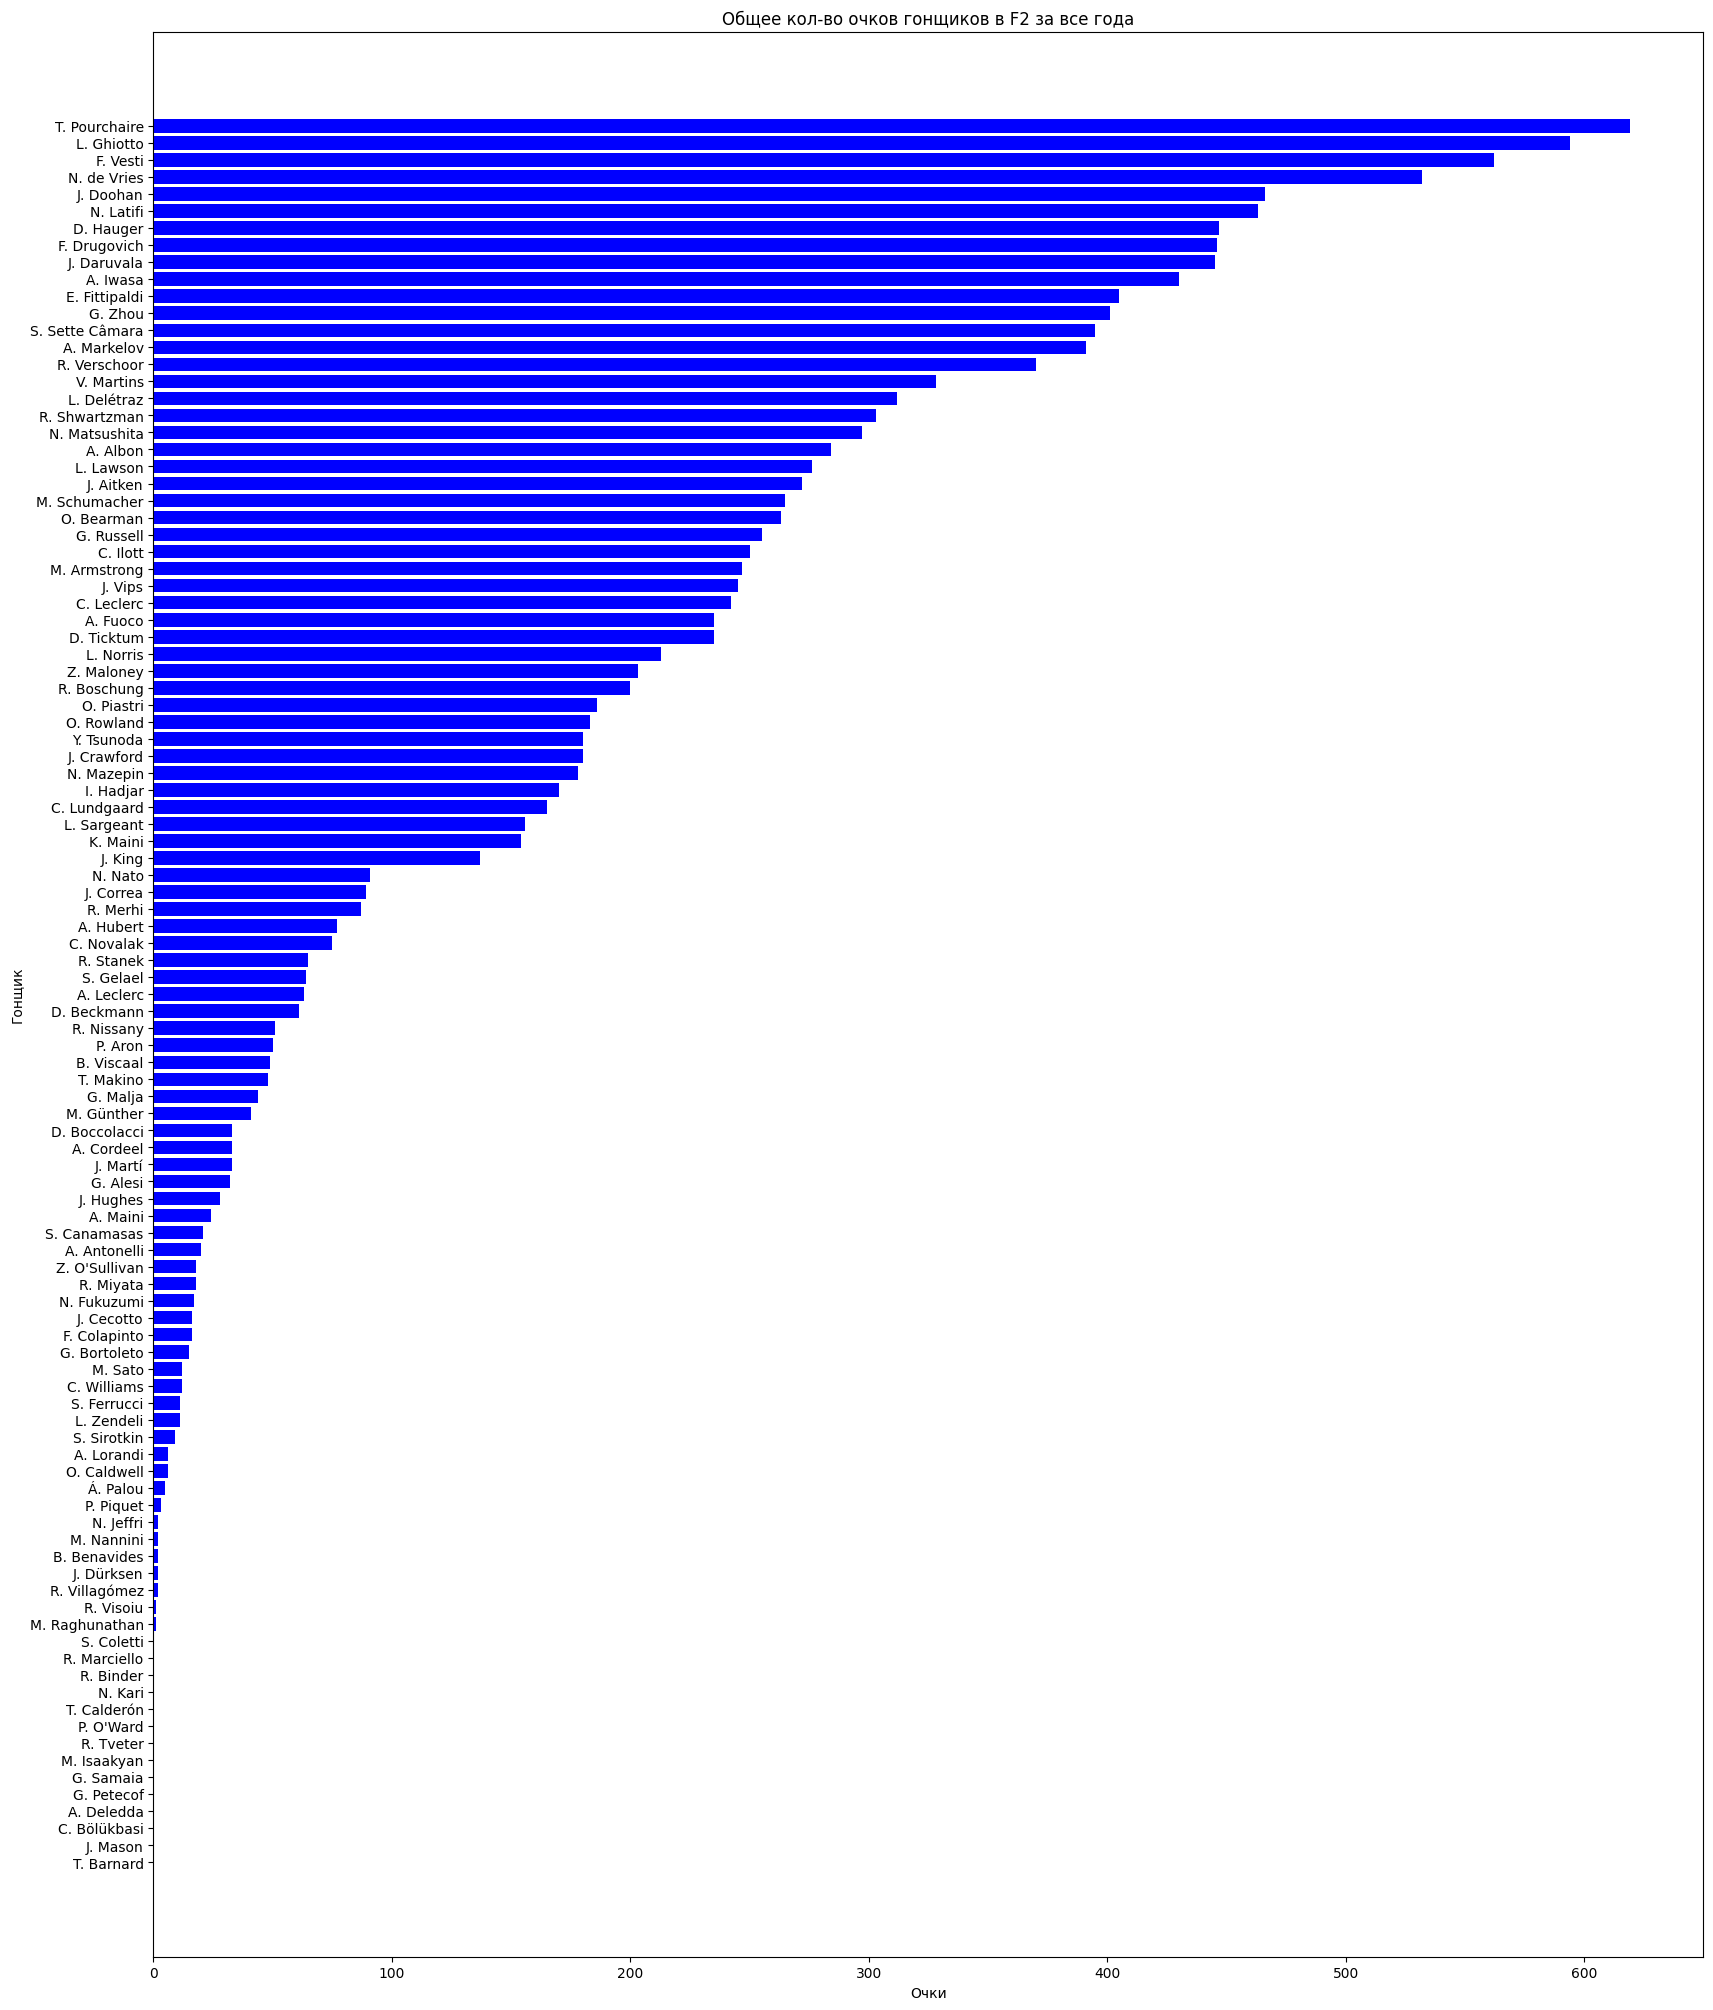

In [247]:
points = sorted(points.items(), key = lambda item: item[1], reverse = True)
drivers, points = zip(*points)

plt.figure(figsize = (20, 25))
plt.barh(drivers, points, color = 'blue')
plt.xlabel('Очки')
plt.ylabel('Гонщик')
plt.title('Общее кол-во очков гонщиков в F2 за все года')
plt.gca().invert_yaxis()
plt.show()

In [248]:
positions = {}


def average_position(url):
    sprint_race = pd.DataFrame(df[url]['drivers']['Sprint Race Results'])
    feature_race = pd.DataFrame(df[url]['drivers']['Feature Race Results'])

    sprint_race['Position'] = pd.to_numeric(sprint_race['Position'], errors = 'coerce')
    feature_race['Position'] = pd.to_numeric(feature_race['Position'], errors = 'coerce')

    for k in range(len(sprint_race)):
        racer = sprint_race.loc[k, 'Driver Name']
        position = sprint_race.loc[k, 'Position']
        if pd.notnull(position):
            if racer in positions:
                positions[racer].append(position)
            else:
                positions[racer] = [position]

    for j in range(len(feature_race)):
        racer = feature_race.loc[j, 'Driver Name']
        position = feature_race.loc[j, 'Position']
        if pd.notnull(position):
            if racer in positions:
                positions[racer].append(position)
            else:
                positions[racer] = [position]

In [249]:
for i in df:
    average_position(i)

average_positions = {racer: sum(positions_list) / len(positions_list) for racer, positions_list in
                     positions.items()}
average_positions = sorted(average_positions.items(), key = lambda item: item[1], reverse = True)

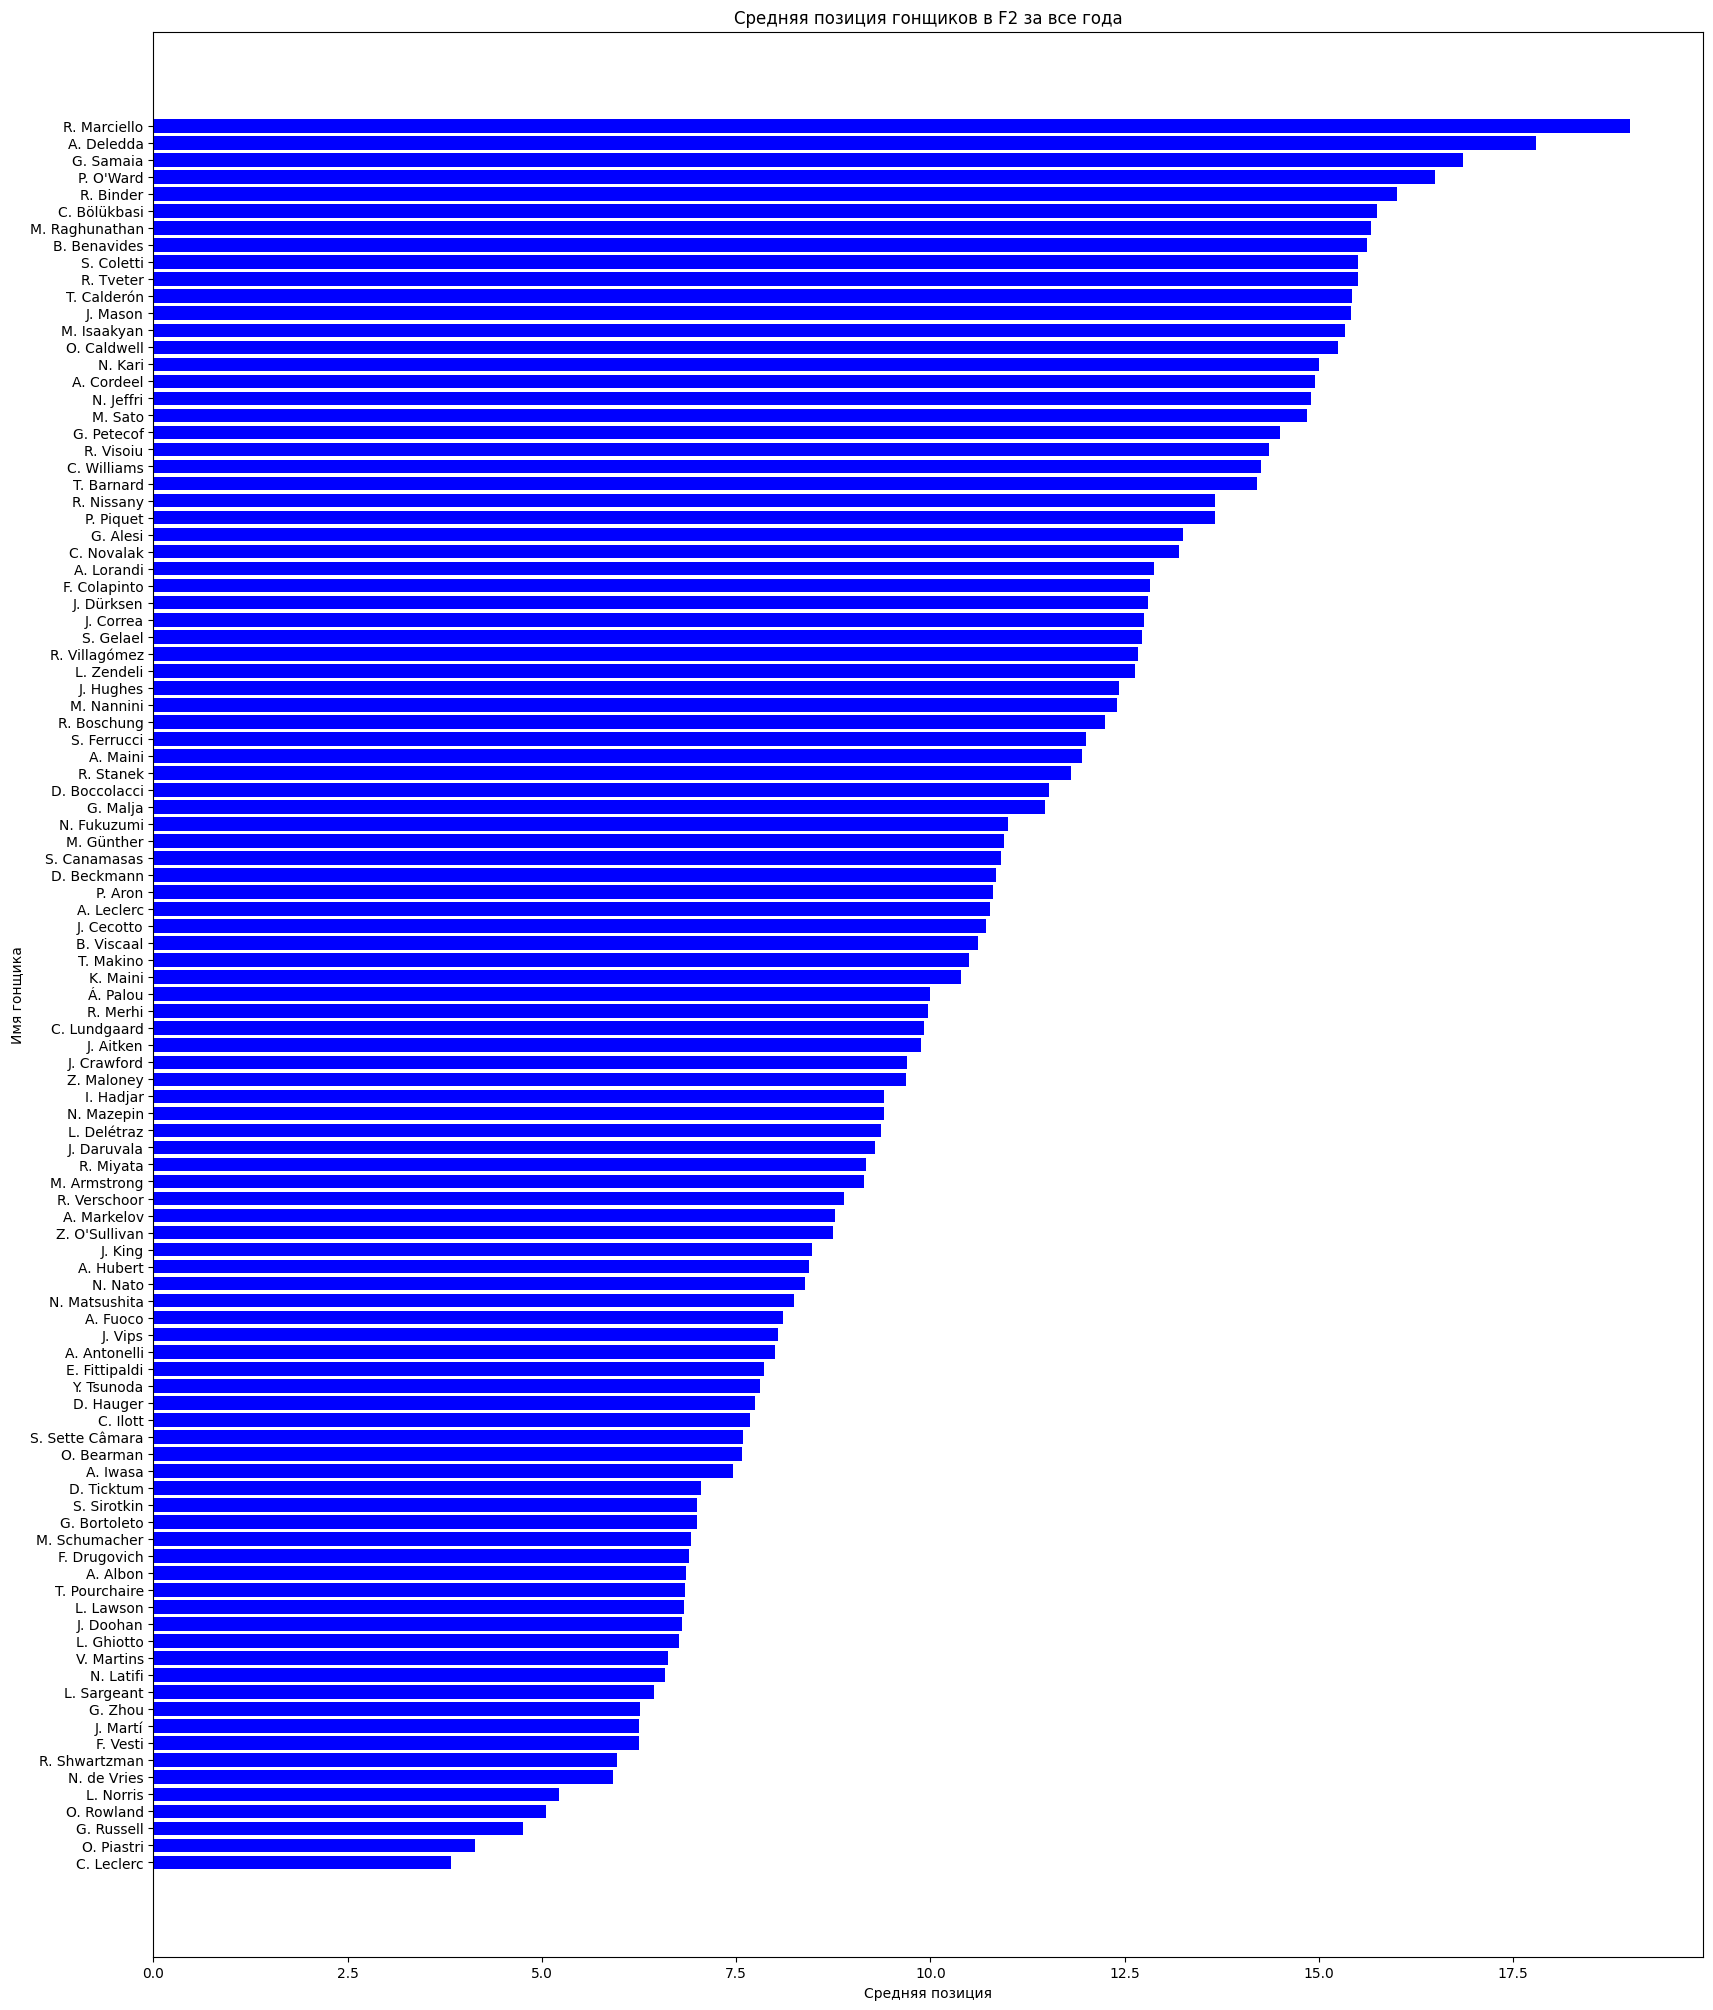

In [250]:
racer_names = [item[0] for item in average_positions]
average_positions_values = [item[1] for item in average_positions]

plt.figure(figsize = (20, 25))
plt.barh(racer_names, average_positions_values, color = 'blue')
plt.xlabel('Средняя позиция')
plt.ylabel('Имя гонщика')
plt.title('Средняя позиция гонщиков в F2 за все года')
plt.gca().invert_yaxis()
plt.show()

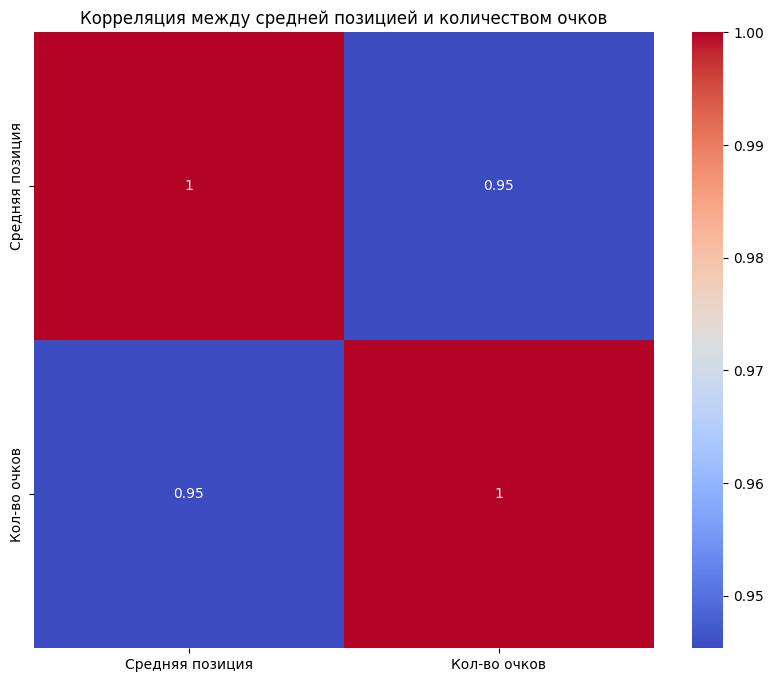

In [251]:
df_corr_avg_position_AllPoints = pd.DataFrame({
    'Средняя позиция': [item[1] for item in average_positions],
    'Кол-во очков': [point for point in points]
})

correlation_matrix = df_corr_avg_position_AllPoints[['Средняя позиция', 'Кол-во очков']].corr()

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', cbar = True)
plt.title('Корреляция между средней позицией и количеством очков')
plt.show()

По графику видно, что существует сильная корреляция между средней позицией и количеством очков